<h1>Results For Read Aligner Robustness<h1>


<h2>Samples and Tools<h2>


In [270]:
import os
from pathlib import Path


global read_009309
global read_181410
global read_183377

global samp_009390
global samp_181410
global samp_183377

read_009309 = 24237308
read_181410 = 44590098
read_183377 = 36747492

samp_009390 = "ERR009309_1_2"
samp_181410 = "ERR181410_1_2"
samp_183377 = "ERR183377_1_2"

nsamps = 3

all_samples=[samp_009390, samp_181410, samp_183377]
tools = ['bowtie2' , 'bowtie', 'subread' , 'smalt', 'STAR']

 
dirpath = os.getcwd()
# print("current directory is : " + dirpath)

# print(dirpath)
# foldername = os.path.basename(dirpath)
# print("Directory name is : " + foldername)
git_folder = str(Path(dirpath).parent)
print(git_folder)
# print(Path(dirpath).parent)

# print([os.path.abspath(name) for name in os.listdir(".") if os.path.isdir(name)])


/Users/pelin/projects/Read_Alignment/read.aligment.review


<h2>Load raw data, read csv_files<h2>

In [271]:
#import data
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from functools import reduce
import numpy as np

subread_df=pd.read_csv(git_folder + "/raw_data/csv_files/subread_results.csv")
smalt_df=pd.read_csv(git_folder + "/raw_data/csv_files/smalt_results.csv")
bowtie_df=pd.read_csv(git_folder + "/raw_data/csv_files/bowtie_results.csv")
bowtie2_df=pd.read_csv(git_folder + "/raw_data/csv_files/bowtie2_results.csv")
STAR_df=pd.read_csv(git_folder + "/raw_data/csv_files/STAR_results.csv")

tool_df=[subread_df, smalt_df, bowtie_df, bowtie2_df, STAR_df]
name_df=['subread', 'smalt','bowtie', 'bowtie2', 'STAR']

new_tool_df=[]

for t_df, n_df in zip(tool_df, name_df ):
#     print(n_df)
    t_df.insert(1,'#reads',None)
    t_df.insert(4,'%read1',None)
    t_df.insert(6,'%read2',None)
    t_df.insert(2,'tool',n_df)
    t_df.iloc[0:5,1] = read_009309
    t_df.iloc[5:10,1] = read_181410
    t_df.iloc[10:15,1] = read_183377
    # drop column about edit distance it it exists for now
    # bwa doesn't provide this info
    t_df = t_df.drop(['r_pe','rp_e','rpc_e','rce_p','rc_pe'], axis=1, errors='ignore')
    t_df['%read1']=round((t_df['unique mapped read 1'] * 100)/t_df['#reads'],2)
    t_df['%read2']=round((t_df['unique mapped read 2'] * 100)/t_df['#reads'],2)
    t_df.insert(loc=10, column='%com_read', value=round((t_df['reads'] * 100)/t_df['#reads'],2))

    new_tool_df.append(t_df)


# list of all tools and samples

concat_df=reduce(lambda x, y: pd.concat([x, y]), new_tool_df)
# concat_df
# print(subread_df)
# print(concat_df)
# new_tool_df[2]






<h2>Plot Bar Charts<h2>
<h3>Plot Bar Charts for Unique Mapped Reads<h3>


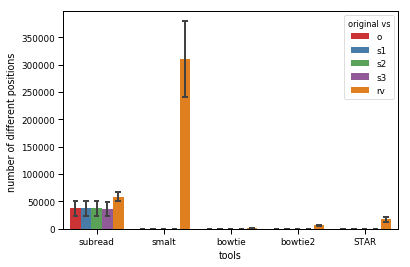

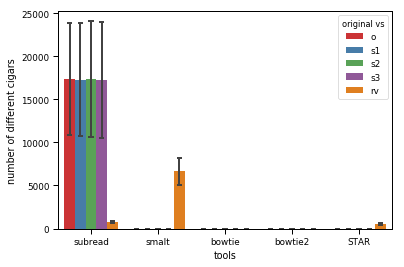

In [569]:
# bar plots
# different position numbers
# bar plots 
# unique read mapped percentage

concat_df_r_p=concat_df[['tool', 'original vs', 'r_p']]
concat_df_r_p=concat_df_r_p.reset_index(drop=True)

concat_df_rp_c=concat_df[['tool', 'original vs', 'rp_c']]
concat_df_rp_c=concat_df_rp_c.reset_index(drop=True)
# print(concat_df_r_p)
# print("-----------")
# print(concat_df_rp_c)




def plot_bar_err(data_df, info, text, label):
    plt.figure()
    ax=sns.barplot(x = "tool", y = info, hue = "original vs", data = data_df,
                palette = 'Set1',
                order = ['subread', 'smalt', 'bowtie', 'bowtie2', 'STAR'], 
                capsize=0.05,  errwidth = 2, ci='sd')
    ax.set(xlabel='tools', ylabel=label)
    path_to_save=git_folder + '/figures/bar_charts/'
    plt.savefig(path_to_save + text + ".pdf", bbox_inches='tight', dpi=50)
    
plot_bar_err(concat_df_r_p, 'r_p', 'diff_pos', 'number of different positions ')
plot_bar_err(concat_df_rp_c, 'rp_c', 'diff_cigar', 'number of different cigars')













In [563]:
# bar plots 
# unique read mapped percentage

def plot_bar1(samp, h):
    appended_data = []
    cur_tool_df = []
    cur_tool = []
    for i in range((len(new_tool_df))):
        cur_tool = new_tool_df[i]
        read1_per=cur_tool[cur_tool['sample'] == samp]['%read1']
        read1_per = read1_per.iloc[0]
        cur_tool = cur_tool[cur_tool['sample'] == samp]
        cur_tool=cur_tool[h]
        headers = cur_tool.iloc[:,1]
        cur_tool_t=cur_tool.transpose()
        cur_tool=cur_tool_t.rename(columns=headers)
        cur_tool.insert(loc=0, column='original', value=read1_per)
        cur_tool=cur_tool.rename(index={'%read2': cur_tool.iloc[0,1]})
        cur_tool= cur_tool[3:]
#         print(cur_tool)
#         print(cur_tool)
        cols = ['o','s1','s2','s3']
        cur_tool.insert(loc = 1, column='shuffled', value = cur_tool[cols].astype(float).mean(axis=1))
        cur_tool =cur_tool.drop(cols, axis=1)


        cur_tool_df.append(cur_tool)

    appended_data = pd.concat(cur_tool_df)

    ax=appended_data.plot(kind='bar')
    ax.set_ylim(bottom=0, top=100)
    plt.legend(['original', 'shuffled', 'rev comp'],
               loc='center left', bbox_to_anchor=(1.0, 0.5))
#     print(appended_data)

    plt.xticks(rotation=45)
#     plt.savefig(samp + ".png", bbox_inches='tight', dpi=100)

# for i in range(len(all_samples)):
#     plot_bar1(all_samples[i], ['tool', 'original vs', '%read1', '%read2'])





<h3>Plot Bar Charts for Common Reads<h3>

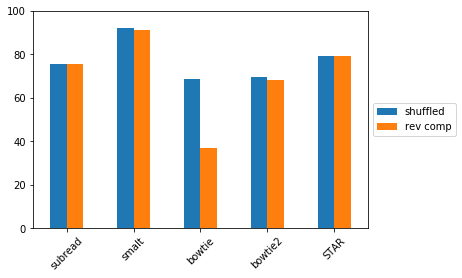

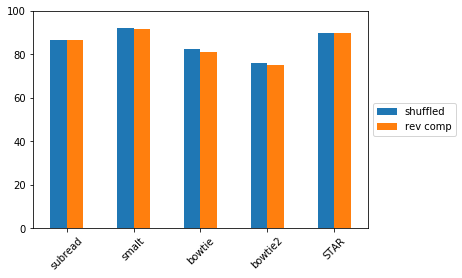

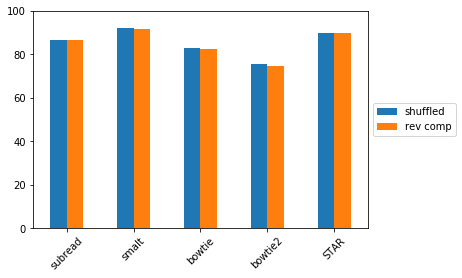

In [276]:
def plot_bar2(samp, h):
    appended_data = []
    cur_tool_df = []
    cur_tool = []
    for i in range((len(new_tool_df))):
        cur_tool = new_tool_df[i]
#         print(cur_tool)
        cur_tool[cur_tool['sample'] == samp]['%com_read']
        cur_tool = cur_tool[cur_tool['sample'] == samp]
        cur_tool=cur_tool[h]
        headers = cur_tool.iloc[:,1]
#         print(headers)
        cur_tool_t=cur_tool.transpose()
        cur_tool=cur_tool_t.rename(columns=headers)
        cur_tool=cur_tool.rename(index={'%com_read': cur_tool.iloc[0,1]})
        cur_tool= cur_tool[2:]
        cols = ['o','s1','s2','s3']
        cur_tool.insert(loc = 1, column='shuffled', value = cur_tool[cols].astype(float).mean(axis=1))
#         cur_tool=cur_tool.drop(cols, axis=1)
        cur_tool =cur_tool.drop(cols, axis=1)
#         print(cur_tool)
        cur_tool_df.append(cur_tool)

    appended_data = pd.concat(cur_tool_df)

    ax=appended_data.plot(kind='bar')
    ax.set_ylim(bottom=0, top=100)
    plt.legend(['shuffled', 'rev comp'],
               loc='center left', bbox_to_anchor=(1.0, 0.5))
#     print(appended_data)

    plt.xticks(rotation=45)
#     plt.savefig(samp + ".png", bbox_inches='tight', dpi=100)

# data_df=reduce(lambda x, y: pd.concat([x, y]), appended_data)


# sns.boxplot(x="tool", y="unique mapped reads", hue="read version", data=data_df, palette="Set1",linewidth=2)



for i in range(len(all_samples)):
       plot_bar2(all_samples[i], ['tool', 'original vs','%com_read'])




<h2>Plot Box Plots<h2>
<h3>Box Plots for Unique Mapped Reads<h3>

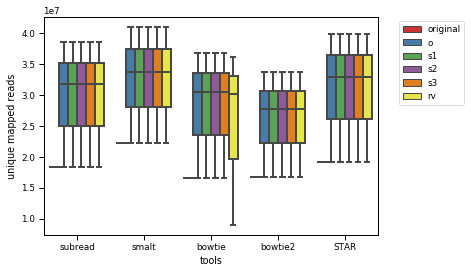

In [564]:
# box plots 
# unique read mapped percentage
import seaborn as sns

data = []
# print(len(new_tool_df))
for i in range(len(new_tool_df)):
    for k in range(len(all_samples)):
        df=new_tool_df[i]
        new_row = df[['sample', 'tool', 'original vs', 'unique mapped read 1']]
        df = df[['sample', 'tool', 'original vs', 'unique mapped read 2']]
        df = df[df['sample'] == all_samples[k]]
        new_row = pd.DataFrame({'sample':all_samples[k],'tool':new_row['tool'][0],'original vs': 'original', 
                                'unique mapped read 2':new_row['unique mapped read 1'][0]}, index =[0])
        df = pd.concat([new_row, df]).reset_index(drop = True) 
        df.rename(columns = {'unique mapped read 2':'unique mapped reads'}, inplace = True) 

        data.append(df)

data_df=reduce(lambda x, y: pd.concat([x, y]), data)
# print(data_df)
data_df=data_df.reset_index(drop=True)
data_df.rename(columns = {'original vs': 'read version'}, inplace = True) 
# print(data_df)



ax=sns.boxplot(x="tool", y="unique mapped reads", hue="read version", data=data_df, palette="Set1",linewidth=2)
# sns.swarmplot(x="tool", y="unique mapped reads", hue="read version", data=data_df, palette="Set1",linewidth=2)
plt.legend(bbox_to_anchor=(1.05,1))
ax.set(xlabel='tools')


path_to_save=git_folder + '/figures/box_plots/'
plt.savefig(path_to_save + 'mapped_reads' + ".pdf", bbox_inches='tight', dpi=50)



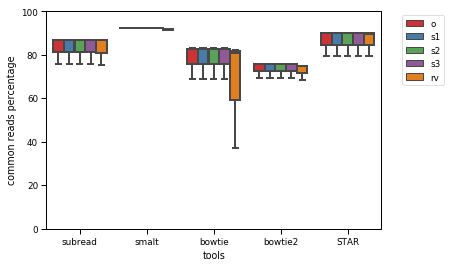

In [566]:
# box plots 
# unique read mapped percentage
import seaborn as sns
# df = concat_df[['sample','tool']]
# df = concat_df[['sample', 'tool', 'original vs', 'unique mapped read 2']]
# df=df.reset_index(drop=True)
# print(len(df))
# df.insert(0, value={'sample': 'test', 'tool': 'test', 'original vs': 'test', 'unique mapped read 2': 'test'})


# print(new_tool_df[0])
# print("^^^^^^^^^^^^^")
data = []
# print(len(new_tool_df))
for i in range(len(new_tool_df)):
    for k in range(len(all_samples)):
        df=new_tool_df[i]
#         print(df)
        df = df[['sample', 'tool', 'original vs', '%com_read']]
        df = df[df['sample'] == all_samples[k]]

        df.rename(columns = {'%com_read':'common reads percentage'}, inplace = True) 

#         print(df)
#         print("----------------")

        data.append(df)
# print(data)
# print(type(data))

data_df=reduce(lambda x, y: pd.concat([x, y]), data)
data_df=data_df.reset_index(drop=True)
data_df.rename(columns = {'original vs': 'read version'}, inplace = True) 


# print(data_df.head(5))


# data_df['unique mapped reads'][0] = 18303341
# print(data_df['unique mapped reads'][0])
# print(data_df.head(50))
ax=sns.boxplot(x="tool", y="common reads percentage", hue="read version", data=data_df, palette="Set1",linewidth=2)
# sns.swarmplot(x="tool", y="unique mapped reads", hue="read version", data=data_df, palette="Set1",linewidth=2)
plt.legend(bbox_to_anchor=(1.05,1))
ax.set(xlabel='tools')
plt.ylim(0, 100)
path_to_save=git_folder + '/figures/box_plots/'
plt.savefig(path_to_save + 'com_reads' + ".pdf", bbox_inches='tight', dpi=50)












<h3>Pie Charts for Same read Different Positions<h3>

In [277]:
# pie charts
# diff pos, same pos
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.CRITICAL)

def plot1(tool_df, samp, headers, title):
    tool_df=tool_df[tool_df['sample'] == samp]
    tool_df=tool_df[['original vs', 'rp' ,'r_p',]]
#     print(tool_df)
    tool_df=tool_df.transpose()
    tool_df=tool_df[1:]
    tool_df.columns = headers

    vals = tool_df.values
    vals1 = vals[0]
    vals2 = vals[1]
    
    sub_plots=tool_df.plot.pie(y=headers, subplots=True,labels=None, figsize =(20,5),autopct='%1.2f%%',
                     labeldistance=1, explode = (0.2, 0), colors=['blue', 'red'],fontsize = 15,
                              shadow=True)
    
#     vals = []
#     for i in range(len(tool_df)):
#         vals[i] = tool_df[i]
    actual_val = []
    for j in range(len(sub_plots)):

        sub_plots[j].legend( loc="best", labels=['same pos', 'diff pos'])
#         print(tool_df.values)
#         sub_plots[j].legend( loc="best", labels=[None,vals2[j]])


    plt.suptitle(title, fontsize=20)
    

#     plt.savefig(title + "_" + samp + ".png", bbox_inches='tight', dpi=50)



head=["ordered", "shuffled1", "shuffled2", "shuffled3", "rev comp"]
# plot1(subread_df, all_samples[0], head,'subread')
# for i in range(len(all_samples)):
# for i in range(1):
#     plot1(subread_df, all_samples[2], head,'subread')
#     plot1(bowtie_df, all_samples[2], head, 'bowtie')
#     plot1(bowtie2_df, all_samples[2], head, 'bowtie2')
#     plot1(STAR_df, all_samples[2], head, 'STAR')






In [278]:
# pie charts
# pie chart same pos same read diff cigar

import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.CRITICAL)

def plot1(tool_df, samp, headers, title):
    tool_df=tool_df[tool_df['sample'] == samp]
    tool_df=tool_df[['original vs', 'rp' ,'rp_c',]]
    tool_df.insert(loc = 1, column='rpc',value = tool_df['rp'] - tool_df['rp_c'])
#     tool_df = tool_df.drop(['rp'])
    tool_df = tool_df.drop(['rp'], axis=1)
#     print(tool_df)
#     cur_tool.insert(loc=0, column='original', value=read1_per)
    tool_df=tool_df.transpose()
    tool_df=tool_df[1:]
    tool_df.columns = headers


    sub_plots=tool_df.plot.pie(y=headers, subplots=True,labels=None, autopct='%1.2f%%', figsize =(20,5),
                     labeldistance=1, explode = (0.2, 0), colors=['blue', 'red'],fontsize = 15, shadow=True)
    
    for j in range(len(sub_plots)):
        sub_plots[j].legend( loc="best", labels=['same cigar', 'diff cigar'])
    plt.suptitle(title, fontsize=20)
    
    
#     plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
#     ax1.set_title('Frauen', fontdict={'fontsize': 17})
    
#     plt.rcParams['font.weight'] = 1
#     plt.savefig(title + "_" + samp + ".png", bbox_inches='tight', dpi=50)



head=["ordered", "shuffled1", "shuffled2", "shuffled3", "rev comp"]

# for i in range(len(all_samples)):
# for i in range(1):
#     plot1(subread_df, all_samples[0], head,'subread')
#     plot1(smalt_df, all_samples[2], head, 'smalt')
#     plot1(bowtie_df, all_samples[2], head, 'bowtie')
#     plot1(bowtie2_df, all_samples[2], head, 'bowtie2')
#     plot1(STAR_df, all_samples[2], head, 'STAR')




<h3>Violin Plots for Position Difference<h3>

In [ ]:
import glob, os
import sys
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from statistics import median
import textwrap


os.chdir(git_folder + '/raw_data/txt_files')

df_file = []
df_file_txt = []

tool = tools[2]
samp = samp_009390

# for i in range(len(all_samples)):
# files = sorted(glob.glob(tool + "_" + all_samples[i] + "_*.txt"))
files = sorted(glob.glob(tool + "_" + samp + "_*.txt"))


path_to_save="../../figures/violin_plots/" + tool + "/"
print(path_to_save)

for file in files: 
    df_file.append(file)
    df_file_txt.append(pd.read_csv(file, header=None))

data = [None,None,None,None,None]

for i in range(len(df_file_txt)):
#     print(df_file[i])
    if "_o-" in df_file[i]:
        data[0] = np.asarray(df_file_txt[i])
    elif "_rv-" in df_file[i]:
        data[1]=np.asarray(df_file_txt[i])

    elif "_s1-" in df_file[i]:
        data[2]=np.asarray(df_file_txt[i])
    elif "_s2-" in df_file[i]:
        data[3]=np.asarray(df_file_txt[i])
    elif "_s3-" in df_file[i]:
        data[4]=np.asarray(df_file_txt[i])

data=[np.asarray(0) if v is None else v for v in data]
# show the plot
# plt.show()
# sns.set_style('whitegrid')
# fig, ax = plt.subplots()
# # the size of A4 paper
# fig.set_size_inches(20, 10)
# # sns.violinplot(data=d, inner="points", ax=ax) 
# # print(len(data))
# sns.violinplot(data=data,  palette=['r','g','b','m','y'], inner='box', scale='count')
# ax.set_xticklabels(['o','rv','s1','s2','s3'], size= 30)
# # ylabels = ['Position difference between','original reads and alternative ordered reads']
# plt.xlabel("alternative ordered reads", fontsize=30)
# plt.ylabel('Position difference',fontsize=30)

# ax.set_xticklabels(textwrap.fill(x.get_text(), 2) for x in ax.get_xticklabels())


# plt.savefig(path_to_save + tool + "_" + all_samples[i] + ".pdf", bbox_inches='tight', dpi=300)
# plt.savefig(path_to_save + tool + "_" + samp + ".pdf", bbox_inches='tight', dpi=300)

